In [1]:
import mysqlconnect

In [2]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [12]:
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
start = '2017-01-01'
end = '2017-06-30'

In [4]:
def get_data(start, end):
    qry = ("select country, channel, sum(sessions) as sessions from t_ga_sampled_sessions_summarized "
           "where activity_date between '{0}' and '{1}' group by country, channel".format(start, end))
    data = mysqlconnect.fetch_data(qry, df=True)
    return data

In [5]:
raw_data = get_data(start, end)

In [6]:
raw_data['sessions'] = raw_data['sessions'].astype(int)

In [7]:
data = raw_data.pivot(index='country', columns='channel', values='sessions')

In [8]:
data['total'] = data['direct'] + data['email'] + data['ifa'] + data['other'] + data['publisher'] +\
                data['referral'] + data['sem'] + data['seo']

In [9]:
percent_data = 100*data[['direct', 'email', 'ifa', 'other', 'publisher', 'referral', 'sem', 'seo']].div(data['total'], axis=0)

In [10]:
final = percent_data.round(4)

In [26]:
def get_percent(country, data):
    return data.loc[country]

In [13]:
def to_df(data):
    x = pd.DataFrame(data.to_dict().items())
    x.columns = ['source', 'percent_share']
    return x

In [47]:
def plot_result(country, data):
    ax = sns.barplot(x="source", y="percent_share", data=to_df(get_percent(country, data)))
    ax.set(xlabel='source', ylabel='traffic share (%)')
    #ax.grid(b=True, which='major', color='grey', linewidth=1.0)
    #ax.grid(b=True, which='minor', color='grey', linewidth=0.5)

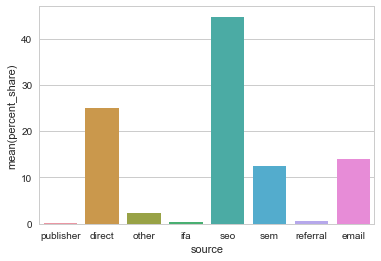

In [29]:
plot_result('GB', final)

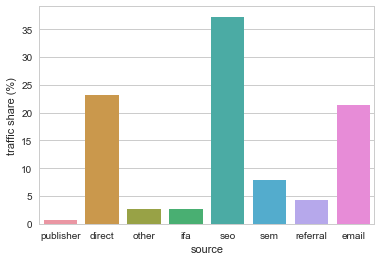

In [48]:
plot_result('CA', final)

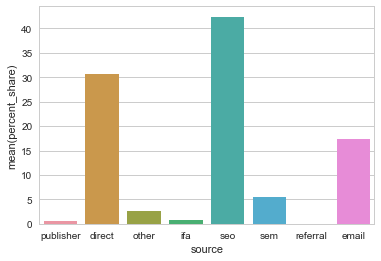

In [31]:
plot_result('US', final)

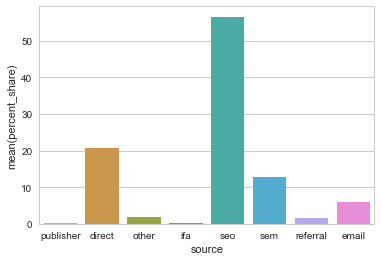

In [32]:
plot_result('JP', final)

In [34]:
get_percent('CA', final)

direct      23.183
email       21.364
ifa          2.679
other        2.688
publisher    0.690
referral     4.347
sem          7.792
seo         37.257
Name: CA, dtype: float64

In [18]:
seo_sorted = final.sort_values(['seo'], ascending=[0])

In [19]:
sem_sorted = final.sort_values(['sem'], ascending=[0])

In [20]:
email_sorted = final.sort_values(['email'], ascending=[0])
direct_sorted = final.sort_values(['direct'], ascending=[0])